

  
      
## Importing Python Libraries

In [ ]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

from tensorflow.keras.utils import to_categorical # Function to convert labels to one-hot encoding
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation,Input
from tensorflow.keras.optimizers import SGD

import sys
## Adding dataset_utils to the system path so we can import it

MY_UTILS_PATH = '/content/dataset_utils.py'
if not MY_UTILS_PATH in sys.path:
    sys.path.append(MY_UTILS_PATH)
import dataset_utils



## Loading and Displaying a Synthetic 2D Dataset

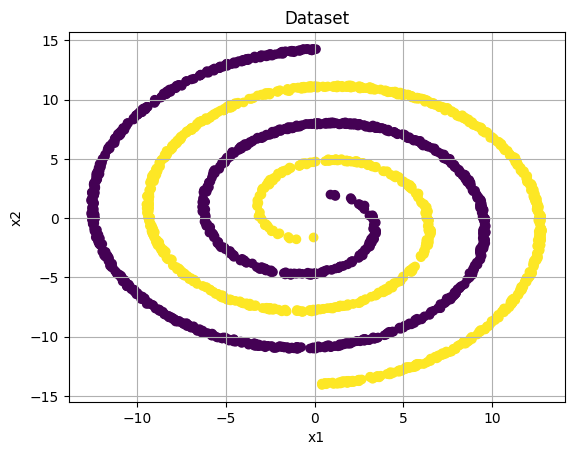

In [ ]:
nsamples = 2000
data = dataset_utils.spirals(N = nsamples,degrees = 720, start = 90)

# Separating features (X) and labels (Y)
Y = data[:,-1].astype(int) # Labels
X = data[:,:-1] # Features

#Number of classes
k = np.unique(Y).size

colors = np.array(['r','y','b','g'])
#Displaying the dataset
plt.scatter(X[:,0],X[:,1],c=Y)
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.title("Dataset")
plt.show()

## Train, Validation and Test Sets Split

In [ ]:
# First we will shuffle the samples
indexes = np.arange(X.shape[0])
np.random.shuffle(indexes)
X = X[indexes,:]
Y = Y[indexes]

# Then, we split our data into train/val/test sets
#train_split = np.int(0.5*Y.size)
#val_split = np.int(0.75*Y.size)
train_split = int(0.5*Y.size)
val_split = int(0.75*Y.size)

X_train = X[:train_split,:]
Y_train = Y[:train_split]

X_val = X[train_split:val_split,:]
Y_val = Y[train_split:val_split]

X_test = X[val_split:,:]
Y_test = Y[val_split:]

## Data Normalization

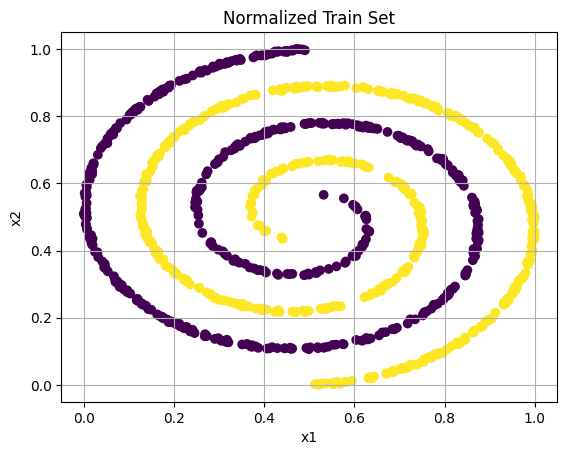

In [ ]:
# min-max data normalization
x_train_min = X_train.min(axis = 0, keepdims = True)
x_train_max = X_train.max(axis = 0, keepdims = True)

X_train = (X_train - x_train_min)/(x_train_max - x_train_min)
X_val = (X_val - x_train_min)/(x_train_max - x_train_min)
X_test = (X_test - x_train_min)/(x_train_max - x_train_min)

#Displaying the normalized train set
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.title("Normalized Train Set")
plt.show()




## Representing Labels using one-hot-encoding

In [ ]:
Y_oh_train = to_categorical(Y_train, k)
Y_oh_val = to_categorical(Y_val, k)
Y_oh_test = to_categorical(Y_test, k)
# Displaying the 5 first elemnts
print('Y_train[:5]:')
print(Y_train[:5])
print('\nY_oh_train[:5]=')
print(Y_oh_train[:5])


Y_train[:5]:
[1 0 1 0 1]

Y_oh_train[:5]=
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


## Defining a Fully Connected Neural Network with Keras

In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# you must create a 5 layers (1 input layer, 3 hidden layers, 1 output layer) fully connected neural network model
def my_model2(k, learning_rate=0.15):
    inputs = Input(shape=(k,))
    hidden1 = Dense(20, activation='relu')(inputs)
    hidden2 = Dense(20, activation='relu')(hidden1)
    hidden3 = Dense(20, activation='relu')(hidden2)
    flat = tf.keras.layers.Flatten()(hidden3)
    out1 = Dense(k, activation='softmax')(flat)
    model = Model(inputs=inputs, outputs=out1)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.15), loss=tf.keras.losses.CategoricalCrossentropy(), metrics = ["accuracy"])


    return model


In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# you must create a 5 layers (1 input layer, 3 hidden layers, 1 output layer) fully connected neural network model
def my_model3(k, learning_rate=0.15):
    # Create a Sequential model
    model = Sequential()

    # Add the input layer (assuming input dimension is k)
    model.add(Dense(units=128, activation='relu', input_shape=(k,)))

    # Add three hidden layers
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=16, activation='relu'))

    # Add the output layer (adjust units for your specific problem)
    model.add(Dense(units=1, activation='sigmoid'))  # For binary classification, change to 'softmax' for multi-class

    # Compile the model
    model.compile(loss='binary_crossentropy',  # Use 'categorical_crossentropy' for multi-class
                  optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
                  metrics=['accuracy'])

    return model


In [ ]:
model = my_model2(k)
print(model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_13 (Dense)            (None, 20)                60        
                                                                 
 dense_14 (Dense)            (None, 20)                420       
                                                                 
 dense_15 (Dense)            (None, 20)                420       
                                                                 
 flatten_2 (Flatten)         (None, 20)                0         
                                                                 
 dense_16 (Dense)            (None, 2)                 42        
                                                                 
Total params: 942 (3.68 KB)
Trainable params: 942 (3.68 KB)

## Training the Model

In [ ]:
history = model.fit(X_train, Y_oh_train, validation_data=(X_val, Y_oh_val), epochs=100, batch_size=train_split)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.7087 - accuracy: 0.4930 - val_loss: 0.9249 - val_accuracy: 0.4840
Epoch 2/100
1/1 [==============================] - 0s 38ms/step - loss: 0.9053 - accuracy: 0.5070 - val_loss: 0.7165 - val_accuracy: 0.5160
Epoch 3/100
1/1 [==============================] - 0s 57ms/step - loss: 0.7122 - accuracy: 0.4930 - val_loss: 0.6901 - val_accuracy: 0.5160
Epoch 4/100
1/1 [==============================] - 0s 64ms/step - loss: 0.6887 - accuracy: 0.4930 - val_loss: 0.6897 - val_accuracy: 0.5380
Epoch 5/100
1/1 [==============================] - 0s 56ms/step - loss: 0.6866 - accuracy: 0.5680 - val_loss: 0.6888 - val_accuracy: 0.5700
Epoch 6/100
1/1 [==============================] - 0s 39ms/step - loss: 0.6876 - accuracy: 0.6190 - val_loss: 0.6852 - val_accuracy: 0.5160
Epoch 7/100
1/1 [==============================] - 0s 60ms/step - loss: 0.6832 - accuracy: 0.4930 - val_loss: 0.6900 - val_accuracy: 0.5160
Epoch 8/100
1/1 [=====

## Prininting Loss and estimated weights (Ws)

Final loss (cross-entropy and accuracy): [0.5943735241889954, 0.6100000143051147]

Layer 0
Bias:
 [-0.7513474   1.0631919  -0.9002029  -0.8398561   0.         -1.131331
 -1.2440153  -0.87874866 -0.8316003   0.         -0.9003101  -0.9006923
  0.         -0.9004183  -0.89837384 -0.9005648  -0.85585326 -0.65740585
  0.4867843  -0.58686477]
W:
 [[-0.8967411  -1.2631719  -0.74455863 -0.47187546 -0.49754086 -1.2843144
  -0.79704607 -0.5312803  -0.8347006  -0.0751529  -0.91795254 -0.80034685
  -0.1066772  -0.83366954 -1.363194   -0.8622987  -0.9735165  -1.2889984
   2.7854424  -1.2500188 ]
 [-0.3521502   0.74907374 -1.2583537  -1.0132403  -0.36156982 -0.63536847
  -1.1262281  -0.77297795 -0.5336623  -0.1243453  -0.6433052  -0.6270043
  -0.45446825 -1.3416173  -0.6646372  -1.1810738  -0.4922448  -0.51011264
  -0.09765431 -0.47764558]]

Layer 1
Bias:
 [-0.2916136  -0.7310682  -0.6204898  -0.7405414  -1.1965392   0.
 -0.41705486 -1.1822083  -0.9007136  -0.6709052  -1.2498387  -0.9866456
 -1.016

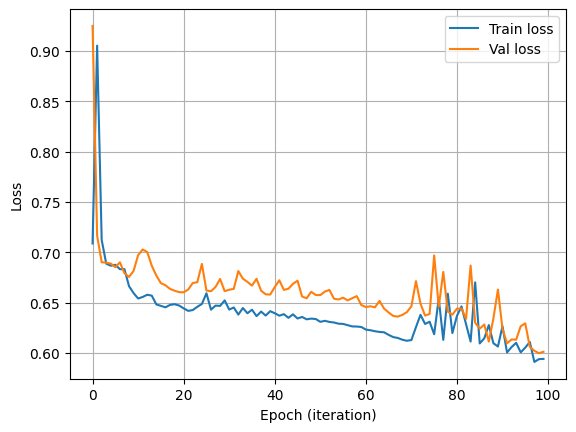

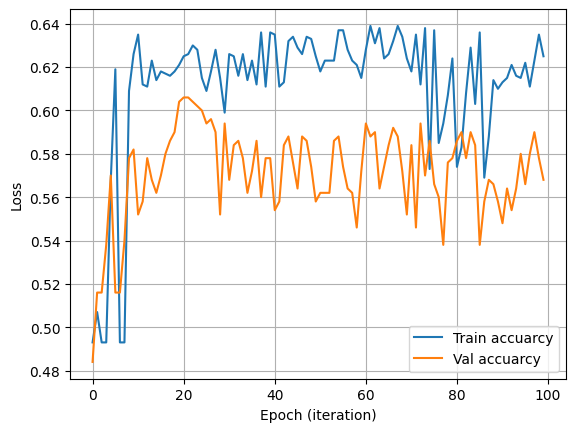

In [ ]:


loss = model.evaluate(X_test, Y_oh_test, verbose=0)
print('Final loss (cross-entropy and accuracy):',loss)
print()
W = model.get_weights()
for ii in range(len(W)//2):
    print("Layer %d" %ii)
    print('Bias:\n', W[2*ii + 1])
    print('W:\n', W[2*ii])
    print()

plt.plot(history.history['loss'], label = "Train loss")
plt.plot(history.history['val_loss'], label = "Val loss")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


plt.plot(history.history['accuracy'], label = "Train accuarcy")
plt.plot(history.history['val_accuracy'], label = "Val accuarcy")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()



## Testing

In [ ]:
# predict the first 10 data from the testing dataset, and show the true labels of the first 10 data

#
num_samples_to_predict = 10
predicted_labels = model.predict(X_val[:num_samples_to_predict])

true_labels = Y_oh_val[:num_samples_to_predict]

true_labels = np.argmax(true_labels, axis=1)


for i in range(num_samples_to_predict):
    print(f"Sample {i + 1}: Predicted Label = {np.argmax(predicted_labels[i])}, True Label = {true_labels[i]}")




1/1 [==============================] - 0s 66ms/step
Sample 1: Predicted Label = 0, True Label = 0
Sample 2: Predicted Label = 1, True Label = 1
Sample 3: Predicted Label = 0, True Label = 0
Sample 4: Predicted Label = 1, True Label = 1
Sample 5: Predicted Label = 1, True Label = 0
Sample 6: Predicted Label = 1, True Label = 0
Sample 7: Predicted Label = 1, True Label = 0
Sample 8: Predicted Label = 0, True Label = 1
Sample 9: Predicted Label = 0, True Label = 0
Sample 10: Predicted Label = 1, True Label = 0
